<a href="https://colab.research.google.com/github/kimjh0607/Deep_Learning/blob/main/05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 구현 해보기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(777)

### 가상 데이터셋

In [ ]:
W_true = 3.0
B_true = 2.0

X = tf.random.normal((500,1))
noise = tf.random.normal((500,1))

In [ ]:
y = X * W_true + B_true + noise

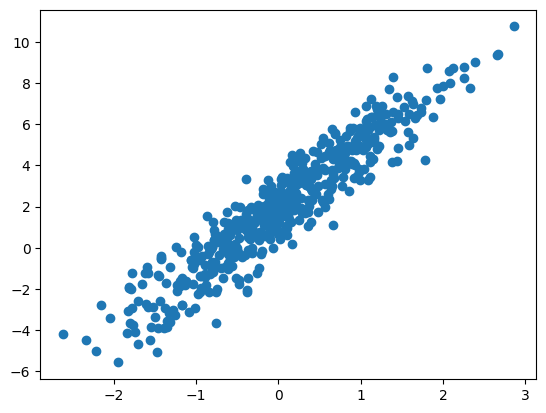

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
w = tf.Variable(5.)
b = tf.Variable(0.)

In [ ]:
lr = 0.03

In [ ]:
w_records = []
b_records = []
loss_records = []

for epoch in range(100):
  with tf.GradientTape() as tape:
    y_hat = X * w + b
    loss = tf.reduce_mean(tf.square(y-y_hat))

  w_records.append(w.numpy())
  b_records.append(b.numpy())
  loss_records.append(loss.numpy())

  dw, db = tape.gradient(loss, [w,b])

  w.assign(w - lr * dw) # w.assing_sub(lr * dw)
  b.assign(b - lr * db)

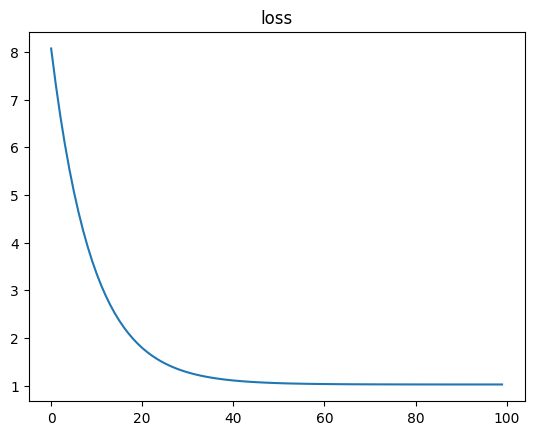

In [ ]:
plt.plot(loss_records)
plt.title('loss')
plt.show()

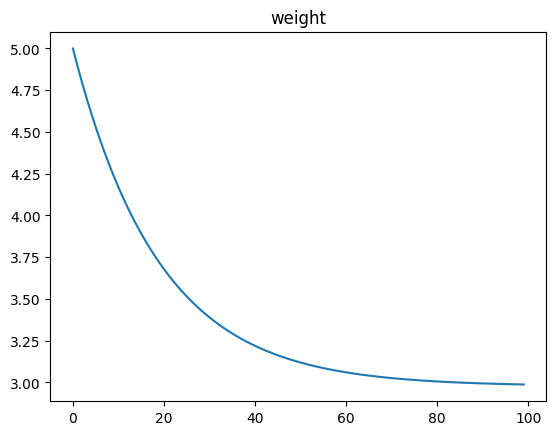

In [ ]:
plt.plot(w_records)
plt.title('weight')
plt.show()

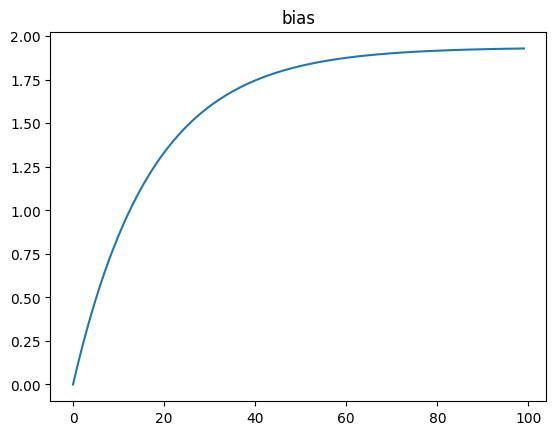

In [ ]:
plt.plot(b_records)
plt.title('bias')
plt.show()

In [ ]:
X[0] * w + b

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.23221], dtype=float32)>

In [ ]:
y[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.0038838], dtype=float32)>

### Dataset 당뇨병 진행도 예측 하기

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names, dtype=np.float32)
df['const'] = np.ones(df.shape[0])
df.tail(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,const
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,1.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,1.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,1.0


#### 먼저!

$X$ 를 Feature, ,$w$를 가중치 벡터, $y$를 Target이라고 할 때,

$X^T X$의 역행령이 존재 한다고 가정했을 때,  

아래의 식을 이용해 $w$의 추정치 $w^*$를 구해봅시다.

$$
w^{\ast} = (X^TX)^{-1} X^T y
$$


-----

### 이번에는, SGD 방식으로 구현해보세요!!

- Conditions
    - steepest gradient descents(전체 데이터 사용)
    - 가중치는 Gaussian normal distribution에서의 난수로 초기화함.
    - step size  == 0.03
    - 100 iteration

In [ ]:
lr = 0.03
num_iter = 100

-----